In [4]:
#########################################
#Data analysis for Hooke's law experiment 
#Data colleceted by dr Jasvir Bhamrah
#########################################


#we import this below as it allows us to to do extra features 

%matplotlib notebook

#Then as stantard, we impport our libaries 

import numpy as np
import matplotlib.pyplot as plt

#Import teh data from the experiment
#unpack=True unpacks each column into a separate array.
xdata, ydata, yerror = np.loadtxt("Spring.csv", delimiter = ',' ,unpack=True) 
print("our x values: ", xdata)
print("our y values: ", ydata)
print("errors on the y-values: ", yerror)

our x values:  [ 20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]
our y values:  [619.8 621.3 622.8 624.5 625.8 627.3 629.3 631.  632.8 634.5]
errors on the y-values:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


<IPython.core.display.Javascript object>


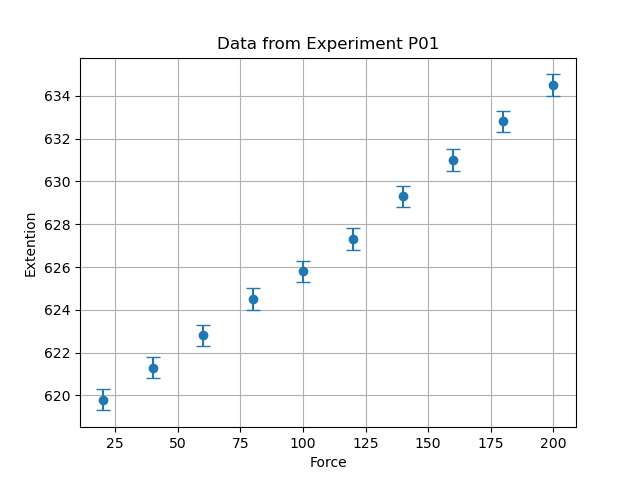

Text(0, 0.5, 'Extention')

In [25]:
# Here we plot the figure 
# We can skip using the plot function and instead use the errorbar function since it also includes the data points 
# We add caps so its easier to read

plt.figure()
plt.errorbar(xdata,ydata,yerr=yerror,capsize = 5,fmt='o')

#add gridlines, titles axis lables

plt.grid(True)  # Add gridlines
plt.title('Data from Experiment P01') 
plt.xlabel('Force')          
plt.ylabel('Extention')


Then we can use the NumPy `polyfit` function to carry out the straight-line fit.
We will first try draw an weighted line 


In [77]:
# A straight line is a polynomial of degree 1.

degree = 1

# To correctly take errors into account, we set weights with w=1/error & use cov='unscaled'
# See https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

coeffs, errors = np.polyfit(xdata,ydata,degree,w=1/yerror,cov='unscaled')
m, c = coeffs  # unpack gradient and intercept from output
dm, dc = np.sqrt(np.diag(errors)) # errors are sqrt of diagonal terms

# Present results with errors
print(f"m = {m:.4f} +- {dm:.4f}")
print(f"c = {c:.2f} +- {dc:.2f}")

m = 0.0817 +- 0.0028
c = 617.92 +- 0.34


<IPython.core.display.Javascript object>


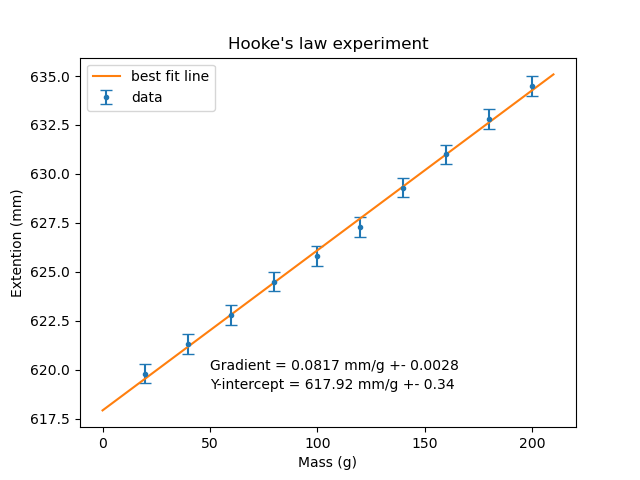

In [88]:
# Now we plot it


# Set up line weighted line
xline = np.array([0,210])
yline_rec  = m * xline + c

# Set up graph
plt.figure()
plt.title("Hooke's law experiment")
plt.xlabel("Mass (g)")
plt.ylabel("Extention (mm)")

# Plot data and lines
plt.errorbar(xdata,ydata,yerr=yerror,fmt='.', capsize = 4, label="data")
plt.plot(xline,yline_rec,'-',label='best fit line')
plt.legend();

# put down our data

plt.text(50, 620, f'Gradient = 0.0817 mm/g +- {dm:.4f}')
plt.text(50, 619, f'Y-intercept = 617.92 mm/g +- {dc:.2f}');

Now we try doing an unweighted line, which doesnt include the errors.

In [79]:
# Fit straight line parameters and calculate errors
# Still using degree 1, but no weights.

coeffs_uw, errors_uw = np.polyfit(xdata,ydata,degree,cov=True)
m_uw, c_uw = coeffs_uw  # unpack gradient and intercept from output
dm_uw, dc_uw = np.sqrt(np.diag(errors_uw)) # errors are sqrt of diagonal terms

# Present results with errors
print(f"m = {m_uw:.4f} +- {dm_uw:.4f}")
print(f"c = {c_uw:.2f} +- {dc_uw:.2f}")

m = 0.0817 +- 0.0013
c = 617.92 +- 0.16


<IPython.core.display.Javascript object>


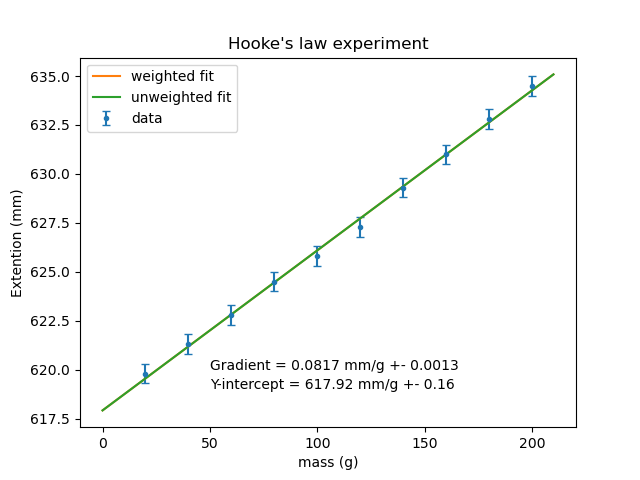

In [87]:
#Now we plot it

# Calculate coordinates to plot unweighted fit
yline_uw  = m_uw * xline + c_uw

# Set up graph
plt.figure()
plt.title("Hooke's law experiment")
plt.xlabel("mass (g)")
plt.ylabel("Extention (mm)")

# Plot data and lines
plt.errorbar(xdata,ydata,yerr=yerror,fmt='.', capsize = 3, label="data")
plt.plot(xline,yline_rec,'-',label='weighted fit')
plt.plot(xline,yline_uw,'-',label='unweighted fit')
plt.legend()

plt.text(50, 620, f'Gradient = 0.0817 mm/g +- {dm_uw:.4f}')
plt.text(50, 619, f'Y-intercept = 617.92 mm/g +- {dc_uw:.2f}');

The weighted and unweighted lines are the same as the error for each value, so weighting the errors makes no difference.

Now we calculate Hooke's constant, k

In [89]:
print('F = ke, k = F/e = mg/e')
print('gradient = e/m, k = g/gradient where g = 9.81 m/s^-2')
g = 9.81 
k = g/m
print(f'So Hookes constant for this spring from this experiment is {k:.4f} N/m +- {dm_uw:.4f}')
print('Even though the our results are in milimeters and grams, we divide them by each other ')
print('so it does not matter if we didnt convert.')

F = ke, k = F/e = mg/e
gradient = e/m, k = g/gradient where g = 9.81 m/s^-2
So Hookes constant for this spring from this experiment is 120.0334 N/m +- 0.0013
Even though the our results are in milimeters and grams, we divide them by each other 
so it does not matter if we didnt convert.
